# Regressão linear

In [1]:
#importar as bibliotecas utilizadas
import numpy as np 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Criação dos dados
Vamos criar uma base de dados e imaginar que são referentes a aptos de uma incorporadora. Nesse sentido:
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [2]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

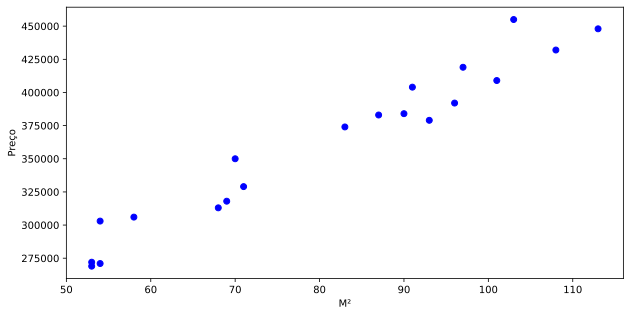

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [6]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [7]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1., 103.],
       [  1.,  97.],
       [  1.,  90.],
       [  1.,  93.],
       [  1.,  96.],
       [  1.,  54.],
       [  1.,  53.],
       [  1.,  83.],
       [  1.,  53.],
       [  1.,  70.],
       [  1.,  54.],
       [  1.,  91.],
       [  1., 101.],
       [  1.,  71.],
       [  1.,  87.],
       [  1.,  58.],
       [  1., 113.],
       [  1.,  68.],
       [  1., 108.],
       [  1.,  69.]])

In [10]:
X_b.T.dot(X_b)

array([[2.00000e+01, 1.61200e+03],
       [1.61200e+03, 1.37496e+05]])

In [11]:
#métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[125807.12926752],
       [  2911.82221752]])

## Ajustando a reta

In [12]:
alpha = theta_best[1] #inclinação
beta = theta_best[0]

In [15]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

In [16]:
ỹ

array([[425724.81767255],
       [408253.8843674 ],
       [387871.12884473],
       [396606.5954973 ],
       [405342.06214988],
       [283045.52901385],
       [280133.70679632],
       [367488.37332206],
       [280133.70679632],
       [329634.68449424],
       [283045.52901385],
       [390782.95106226],
       [419901.1732375 ],
       [332546.50671176],
       [379135.66219216],
       [294692.81788394],
       [454843.0398478 ],
       [323811.04005919],
       [440283.92876017],
       [326722.86227671]])

## Plotando os Dados

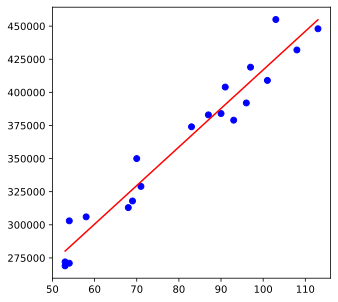

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

## Como implementar uma regressão linear usando o Scikit-learn?

In [18]:
from sklearn.linear_model import LinearRegression

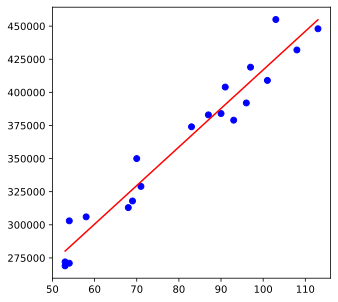

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X, y)

LinearRegression()

In [22]:
ỹ = lr.predict(X)

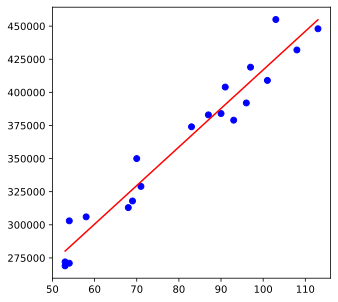

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [24]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.95


## Avaliando meu modelo de regressão

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))

MAE: 11524.127999154432
MSE: 171167507.39879516
RMSE: 13083.100068362817
